In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import re

bow = {}
f = open("datasets/_chat.txt")
next(f)
for line in f.readlines():
    tokens = re.sub("\[.+\] .+: ", "", line).strip().split()
    for tok in tokens:
        bow.setdefault(tok, 0)
        bow[tok] += 1

In [10]:
bow

{'Heyheyy': 1,
 'Hey': 27,
 'Annatolia': 3,
 'hahahahah': 5,
 'Wat': 811,
 'is': 7782,
 'je': 12462,
 'favoriete': 14,
 'emoji': 20,
 'Hmm': 325,
 'Geef': 20,
 'een': 6349,
 'serieus': 72,
 'antwoord': 22,
 '💁🏼\u200d♀️': 8,
 'Hoezo': 220,
 'doe': 434,
 'dat': 8799,
 'bij': 1560,
 'contacten': 2,
 'ofzo': 517,
 '?': 863,
 'Bij': 89,
 'deze': 452,
 'heet': 43,
 'Anna': 134,
 'Nou': 532,
 'kijk': 300,
 'Goals': 2,
 'Hehe': 55,
 'precies': 348,
 'Stel': 25,
 'nou': 276,
 'had': 723,
 'echt': 2597,
 'crazy': 152,
 'gekozen': 10,
 '🤪': 5,
 'Zoals': 68,
 '🥴': 8,
 'C': 16,
 'R': 13,
 'A': 16,
 'Z': 13,
 'Y': 13,
 'ja': 2089,
 'hahaha': 481,
 'Cray': 6,
 'cray': 47,
 'Hahah': 35,
 'Wel': 279,
 'teleurstellend': 4,
 'hoe': 921,
 '“crazy”': 1,
 'dan': 4378,
 'bent': 888,
 'Ik': 5401,
 'verwacht': 56,
 'loco': 5,
 'was': 1594,
 'sorry': 359,
 'hoor': 524,
 '😢': 27,
 'Geen': 228,
 'zorgen': 214,
 'kan': 2324,
 'altijd': 590,
 'nog': 3016,
 'bewijzen': 11,
 '😉': 43,
 '\u200e\u200eGIF': 127,
 'weggel

In [18]:
bow["bazinga"]

44

In [39]:
from wordcloud import WordCloud

f = open("datasets/_chat.txt")
next(f)
data = ""
for line in f.readlines():
    data += re.sub("\[.+\] .+: ", "", line).strip()


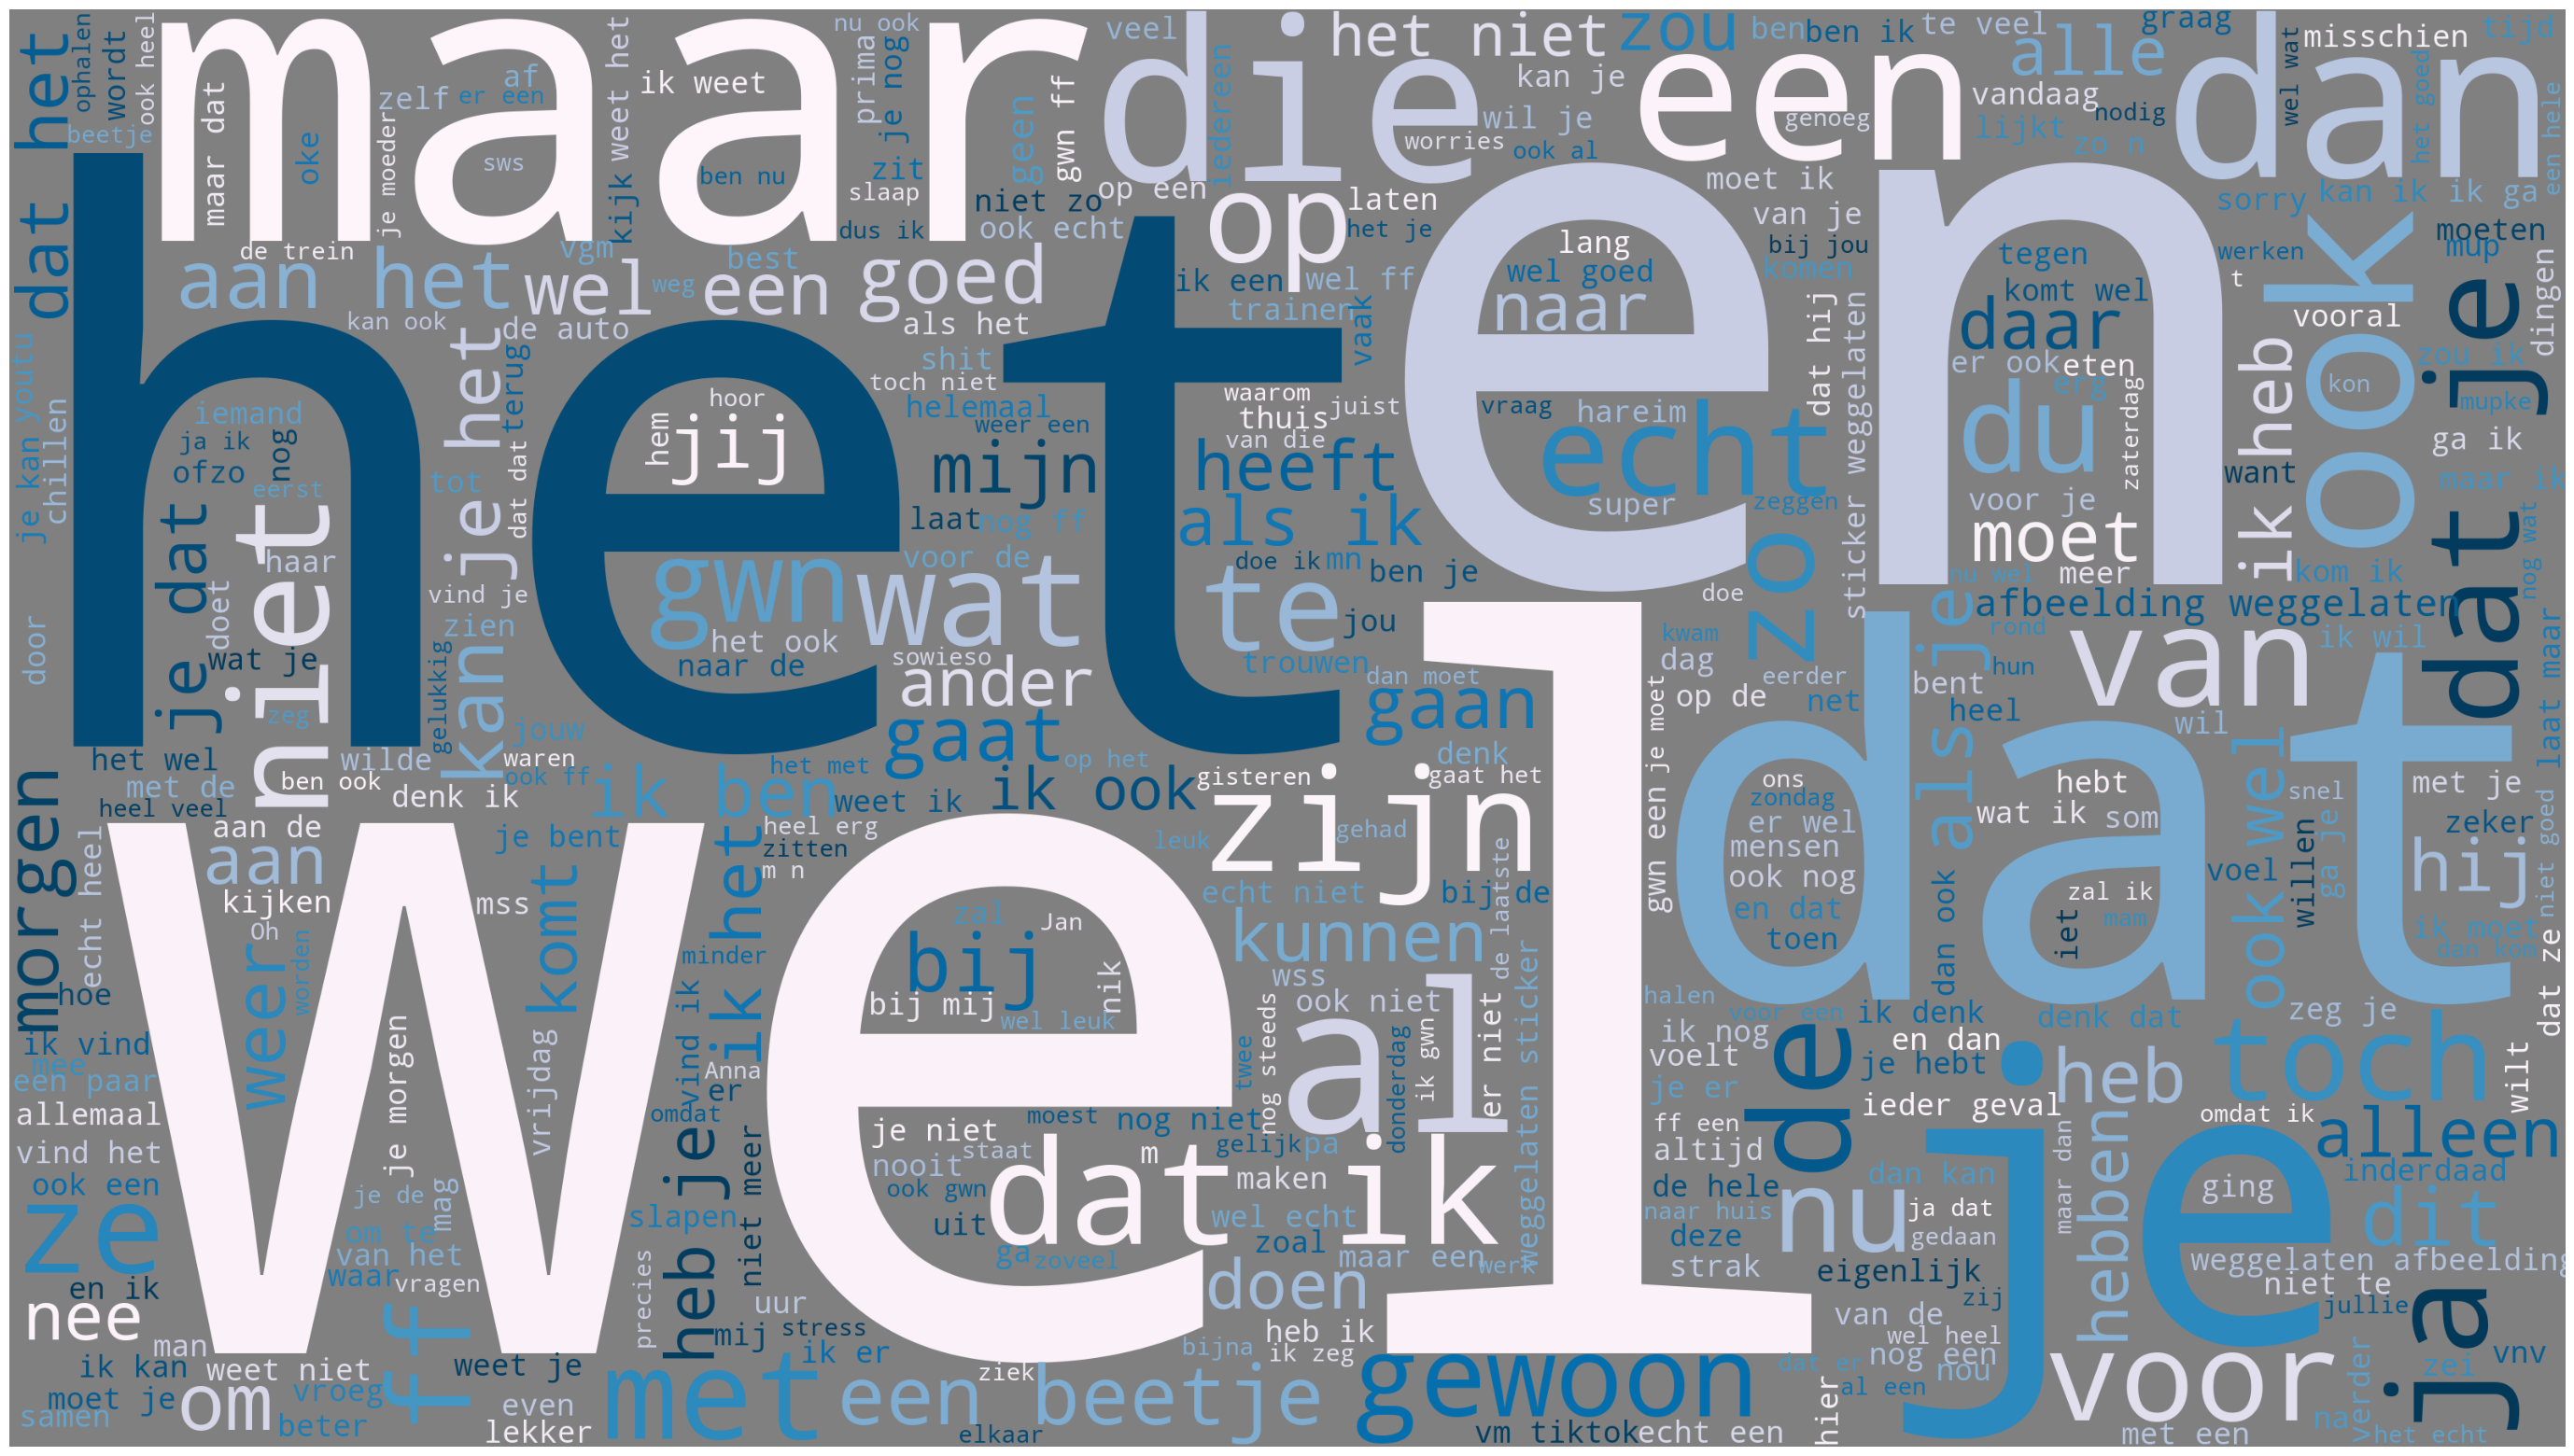

In [45]:

wc = WordCloud(width=1600, height=900, max_words=400, scale=2, background_color="gray", colormap="PuBu").generate(data)

plt.figure(figsize = (40,20))
plt.axis("off")
plt.imshow(wc)


In [ ]:
f = open("datasets/_chat.txt")
next(f)

for line in f.readlines():
    data += re.sub("\[.+\] .+: ", "", line).strip()
